###    Create a multi input Neural Network Based on the functional API of Keras Tensor FLow

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
from sklearn.preprocessing import OneHotEncoder

#### Define Inputs i.e. total features for each inputs 

In [26]:
n1 =  5 ;        # [load, Bt_Prod, Ht_Prod] where Ht_Prod = [P0010, P0018,P0100]
# n2 = 12+12+7+6   # 12 months || 6h-18h ==> 12 H || 7 days in a week || 6 periods (1:0mn ,2:10mn ... 6:50mn)
n2 = 4   # 12 months || 6h-18h ==> 12 H || 7 days in a week || 6 periods (1:0mn ,2:10mn ... 6:50mn)

actv_func ='relu'
in1_ts = 60      # Number of time steps per batch for the input 1
in2_ts = 18       # Number of time steps per batch for the second input

# Define model output_features
n_out_mod1 = n1 # The model must to predict all the input n1 

# batchSizes = 32

in1 = keras.Input(shape=(in1_ts,n1), name='Numeric')  # Input 1 | For the input intanciate only the feature dimension. i.e. create a tensor as 
                                  # in1.shape = [None, n1]
# Input 2 
in2 = keras.Input(shape=(in2_ts, n2), name='Categorical')   # Input 2 


In [27]:
in1.get_shape()

TensorShape([None, 60, 5])

#### Define number of cell on different layers

In [28]:
neur_lstm_layer1 = 40
neur_lstm_layer2 = 40
neur_lstm_layer3 = 30

#### Input 1 

##### Create hidden layers

In [62]:
in1_layer1    = layers.LSTM(128, activation=actv_func) # Create the first layer of model 1
in1_layer2    = layers.LSTM(neur_lstm_layer2, activation=actv_func, )                        # Create the second layer of model 1
# in1_layer3    = layers.LSTM(neur_lstm_layer3, activation=actv_func)

##### Link input 1 to hidden layer 1
Since the layer is an LSTM,  one needs to reshape the input such that its dimension in [x,y,z] so they can correspond to a LSTM's. 
- x ==> batch size, 
- y ==> nber_time_step_per batch ,
- z ==> number of feature

In [63]:
in1_layer1_out = in1_layer1(in1)        
# in1_layer1_out = in1_layer1(tf.reshape(in1, (-1, in1_ts, n1 )))        

# Since we are returning the sequence of the previous lstm layer it can be directly link to the second layer
# in1_layer2_out = in1_layer2(in1_layer1_out)  # Link output of hiddend layer 1 to to hidden layer 2
# in1_layer3_out = in1_layer3(in1_layer2_out)

#### Input 2

##### Create hidden layers

In [64]:
in2_layer1 = layers.LSTM(64,activation=actv_func)
# in2_layer2 = layers.LSTM(neur_lstm_layer1, activation=actv_func, )
# in2_layer3 = layers.LSTM(neur_lstm_layer1, activation=actv_func)

##### Link input 2 to hidden layer 1
**<span style='color:red'> SAME PROCESS AS WITH INPUT 1 </span>**

In [65]:
# in2_layer1_out = in2_layer1(tf.reshape(in2, (-1, in2_ts, n2)),)
in2_layer1_out = in2_layer1(in2)
# in2_layer2_out = in2_layer2(in2_layer1_out)
# in2_layer3_out = in2_layer3(in2_layer2_out)

In [66]:
in2.shape

TensorShape([None, 18, 4])

#### Combine both input 

In [67]:
# # concatanate output of hidden layer2 of two imputs
comb_out = layers.concatenate([in1_layer1_out, in2_layer1_out])

#### Create an intermediate and the output layer and link them together with 

In [68]:
neur_lstm_layer2

40

In [74]:
# create new dense Layer and connect to the concatanation of in1_2
x = layers.Dense(60)(comb_out)

#Seonde dense layer 
y = layers.Dense(256)(x)

# 
out_mod = layers.Dense(n1, activation='relu')(y)

#### Create final model 

In [75]:
mixed_model = keras.Model(inputs=[in1,in2], outputs=out_mod)

#### Show model parameters

In [76]:
mixed_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Numeric (InputLayer)           [(None, 60, 5)]      0           []                               
                                                                                                  
 Categorical (InputLayer)       [(None, 18, 4)]      0           []                               
                                                                                                  
 lstm_9 (LSTM)                  (None, 128)          68608       ['Numeric[0][0]']                
                                                                                                  
 lstm_11 (LSTM)                 (None, 64)           17664       ['Categorical[0][0]']            
                                                                                            

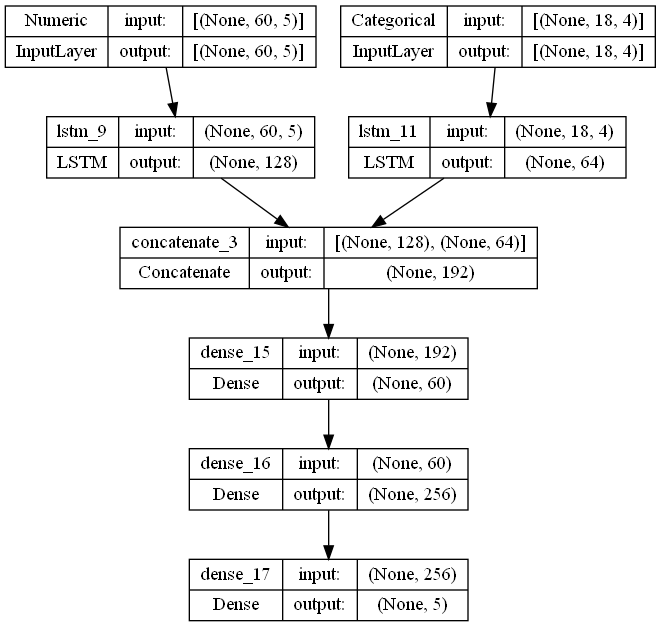

In [77]:
keras.utils.plot_model(mixed_model, show_shapes=True, )

In [78]:
mixed_model.save("pickle_files/RNN/Multi_Input")

INFO:tensorflow:Assets written to: pickle_files/RNN/Multi_Input\assets


INFO:tensorflow:Assets written to: pickle_files/RNN/Multi_Input\assets


In [46]:
mixed_model.input

[<KerasTensor: shape=(None, 72, 5) dtype=float32 (created by layer 'Numeric')>,
 <KerasTensor: shape=(None, 72, 4) dtype=float32 (created by layer 'Categorical')>]

### Reading [# Forecasting: Principles and Practice](https://otexts.com/fpp3/)



#### Getting Started

###### Time Series Data :
Data collected at regular spaced interval over time


###### Cross -sectional data : 
Data collected at asogle point in time

###### Decomposition method's role in time series prediction: 
They are useful for studying the trend and seasonal pattern in a time series

Supposing $ED$ represent the Electricity demand, its <span>Explanatory model </span> 
Helps explain what couses the variation in a variable to predict. , 